### This implementation is entirely translated from the [Qiskit Textbook content on Grover's algorithm](https://github.com/Qiskit/textbook/blob/main/notebooks/ch-algorithms/grover.ipynb).

---

In [1]:
from MiQE import *

## 2-qubit algorithm for amplification of $|11\rangle$

In [2]:
n = 2

grover_circuit = QuantumCircuit(n)
grover_circuit.gate(H, 0, 1)

grover_circuit.diracify()

grover_circuit.C(Z, 0, 1)

grover_circuit.diracify()

grover_circuit.gate(H, 0, 1)
grover_circuit.gate(Z, 0, 1)
grover_circuit.C(Z, 0, 1)
grover_circuit.gate(H, 0, 1)

grover_circuit.diracify()

(0.5) |00⟩ + (0.5) |01⟩ + (0.5) |10⟩ + (0.5) |11⟩
(0.5) |00⟩ + (0.5) |01⟩ + (0.5) |10⟩ + (-0.5) |11⟩
(1) |11⟩


## 3-qubit algorithm for amplification of $|101\rangle$ and $|110\rangle$

In [3]:
def diffuser(qubits):
    
    qc = QuantumCircuit(qubits)

    qc.gate(H, *[qubit for qubit in range(qubits)])
    qc.gate(X, *[qubit for qubit in range(qubits)])

    qc.C(Z, list(range(qubits-1)), qubits-1)

    qc.gate(X, *[qubit for qubit in range(qubits)])
    qc.gate(H, *[qubit for qubit in range(qubits)])

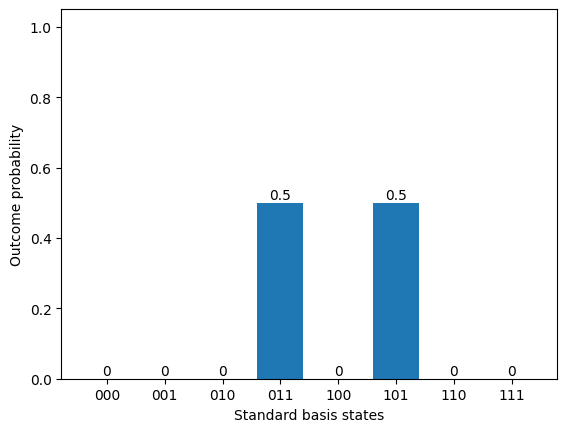

In [4]:
n = 3

# initialisation
grover_circuit = QuantumCircuit(n)
grover_circuit.gate(H, *[qubit for qubit in range(n)])

# oracle
grover_circuit.C(Z, 0, 2)
grover_circuit.C(Z, 1, 2)

# diffuser
grover_circuit.gate(H, *[qubit for qubit in range(n)])
grover_circuit.gate(X, *[qubit for qubit in range(n)])
grover_circuit.C(Z, list(range(n-1)), n-1)
grover_circuit.gate(X, *[qubit for qubit in range(n)])
grover_circuit.gate(H, *[qubit for qubit in range(n)])

grover_circuit.plot_probs(output='plot')

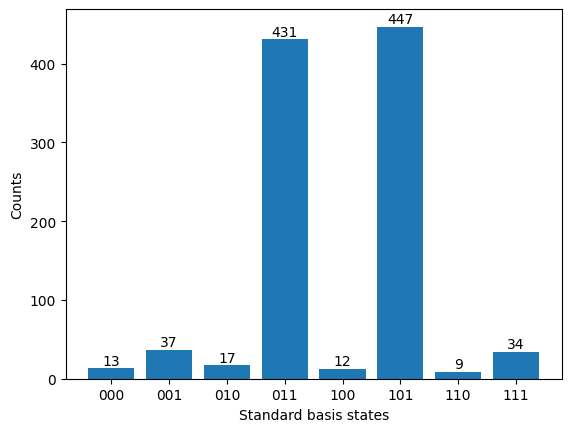

In [5]:
def noisy_grover():

    n = 3
    
    # initialisation
    grover_circuit = QuantumCircuit(n, random_error=0.001)
    grover_circuit.gate(H, *[qubit for qubit in range(n)])
    
    # oracle
    grover_circuit.C(Z, 0, 2)
    grover_circuit.C(Z, 1, 2)
    
    # diffuser
    grover_circuit.gate(H, *[qubit for qubit in range(n)])
    grover_circuit.gate(X, *[qubit for qubit in range(n)])
    grover_circuit.C(Z, list(range(n-1)), n-1)
    grover_circuit.gate(X, *[qubit for qubit in range(n)])
    grover_circuit.gate(H, *[qubit for qubit in range(n)])

    return grover_circuit

run_circuit(noisy_grover, shots=1000, output='plot')